### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.25
ma1_Shape2 = fn.input()[0] > 0.5
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.25) & (fn.input()[0] <= 0.5)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


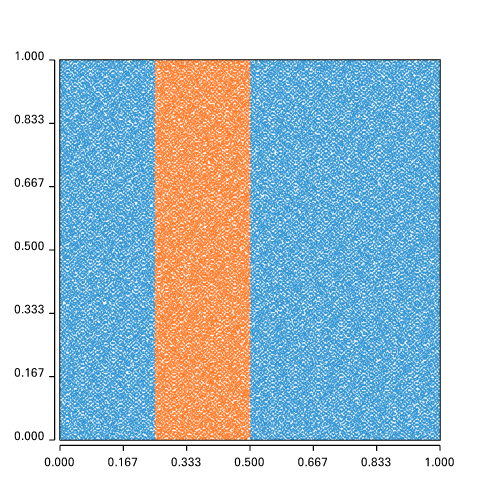

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  0.95


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 1.

In [7]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [8]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002455 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23899e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001339 secs 
  RHS V Solve:            = 0.003507 secs / 7 its
  Pressure Solve:         = 0.1145 secs / 28 its
  Final V Solve:          = 0.005451 secs / 7 its

  Total BSSCR Linear solve time: 0.137795 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.385339e-01 (secs)
Time Integration
	2nd order:     

Time Integration
	2nd order:                 6P13091D__integrand -    0.0806 [min] /    0.0806 [max] (secs)
Time Integration - 0.0806096 [min] / 0.0806096 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.553256e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-02 15:28:42)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33949e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001433 secs 
  RHS V Solve:            = 0.00365 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002430 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24586e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001341 secs 
  RHS V Solve:            = 0.003903 secs / 7 its
  Pressure Solve:         = 0.1243 secs / 28 its
  Final V Solve:          = 0.004464 secs / 7 its

  Total BSSCR Linear solve time: 0.146671 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.470155e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.08333 [min] / 0.08333 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.260525e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-02 15:29:00)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002657 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40152e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.004763 secs / 7 its
  Pressure Solve:         = 0.173 secs / 28 its
  Final V Solve:          = 0.01227 secs / 7 its

  Total BSSCR Linear solve time: 0.205958 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.064067e-01 (secs)
Time Integration
	2nd order:                 6P13091

Time Integration
	2nd order:                 6P13091D__integrand -    0.0874 [min] /    0.0874 [max] (secs)
Time Integration - 0.0874471 [min] / 0.0874471 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.521059e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-02 15:29:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002582 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27028e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001377 secs 
  RHS V Solve:            = 0.003846 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002924 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35580e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001469 secs 
  RHS V Solve:            = 0.004695 secs / 7 its
  Pressure Solve:         = 0.1165 secs / 28 its
  Final V Solve:          = 0.003689 secs / 7 its

  Total BSSCR Linear solve time: 0.140862 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.412047e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887809 [min] / 0.0887809 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.767717e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-02 15:29:23)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002982 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44587e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001562 secs 
  RHS V Solve:            = 0.00493 secs / 7 its
  Pressure Solve:         = 0.1478 secs / 28 its
  Final V Solve:          = 0.003654 secs / 7 its

  Total BSSCR Linear solve time: 0.173206 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.736871e-01 (secs)
Time Integration
	2nd order:                 6P1309

Time Integration
	2nd order:                 6P13091D__integrand -    0.0978 [min] /    0.0978 [max] (secs)
Time Integration - 0.0978695 [min] / 0.0978695 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.811892e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-02 15:29:31)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002455 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25496e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001355 secs 
  RHS V Solve:            = 0.00382 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004194 seconds

SROpGenerator_SimpleFinestLevel: time = 2.26517e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002453 secs 
  RHS V Solve:            = 0.01075 secs / 7 its
  Pressure Solve:         = 0.2315 secs / 27 its
  Final V Solve:          = 0.003554 secs / 7 its

  Total BSSCR Linear solve time: 0.269487 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.699906e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0891 [min] /    0.0891 [max] (secs)
Time Integration - 0.0891383 [min] / 0.0891383 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.108429e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-02 15:29:49)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002843 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36867e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.005578 secs / 7 its
  Pressure Solve:         = 0.1648 secs / 27 its
  Final V Solve:          = 0.003938 secs / 7 its

  Total BS

Time Integration
	2nd order:                 6P13091D__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933192 [min] / 0.0933192 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.616043e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-02 15:29:56)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002377 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20356e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001292 secs 
  RHS V Solve:            = 0.003883 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002802 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20649e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001319 secs 
  RHS V Solve:            = 0.006767 secs / 10 its
  Pressure Solve:         = 0.1592 secs / 29 its
  Final V Solve:          = 0.006792 secs / 10 its

  Total BSSCR Linear solve time: 0.187758 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.881909e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.092337 [min] / 0.092337 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.647714e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-02 15:30:14)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002740 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29724e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.005593 secs / 10 its
  Pressure Solve:         = 0.1578 secs / 29 its
  Final V Solve:          = 0.006134 secs / 10 its

  Total BSSCR Linear solve time: 0.184577 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.849015e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.090863 [min] / 0.090863 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.777590e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-02 15:30:21)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002882 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41185e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.004073 secs /

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002846 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38204e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001489 secs 
  RHS V Solve:            = 0.004698 secs / 7 its
  Pressure Solve:         = 0.1199 secs / 27 its
  Final V Solve:          = 0.003996 secs / 7 its

  Total BSSCR Linear solve time: 0.144704 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.450453e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929027 [min] / 0.0929027 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.682193e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-02 15:30:38)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002533 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23246e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001337 secs 
  RHS V Solve:            = 0.004074 secs / 7 its
  Pressure Solve:         = 0.1114 secs / 27 its
  Final V Solve:          = 0.00399 secs / 7 its

  Total BSSCR Linear solve time: 0.133991 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.343703e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0867 [min] /    0.0867 [max] (secs)
Time Integration - 0.0866975 [min] / 0.0866975 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.698405e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-02 15:30:45)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002871 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41126e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.004981 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002693 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33704e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001445 secs 
  RHS V Solve:            = 0.004008 secs / 7 its
  Pressure Solve:         = 0.1102 secs / 27 its
  Final V Solve:          = 0.003954 secs / 7 its

  Total BSSCR Linear solve time: 0.132804 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.331713e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938634 [min] / 0.0938634 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.603083e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-02 15:31:02)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003034 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40651e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001525 secs 
  RHS V Solve:            = 0.004857 secs / 8 its
  Pressure Solve:         = 0.1091 secs / 27 its
  Final V Solve:          = 0.004025 secs / 7 its

  Total BSSCR Linear solve time: 0.133946 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.343507e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0905 [min] /    0.0905 [max] (secs)
Time Integration - 0.0905322 [min] / 0.0905322 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.812191e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-02 15:31:08)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002850 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41654e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001518 secs 
  RHS V Solve:            = 0.007263 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002586 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35971e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.004841 secs / 8 its
  Pressure Solve:         = 0.1113 secs / 27 its
  Final V Solve:          = 0.004195 secs / 7 its

  Total BSSCR Linear solve time: 0.135669 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.360330e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.090864 [min] / 0.090864 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.584189e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-02 15:31:25)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002803 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43188e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.004243 secs / 7 its
  Pressure Solve:         = 0.1094 secs / 27 its
  Final V Solve:          = 0.00399 secs / 7 its

  Total BSSCR Linear solve time: 0.133148 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.335110e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914077 [min] / 0.0914077 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.784233e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-02 15:31:31)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002881 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40521e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.003837 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002590 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30384e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001414 secs 
  RHS V Solve:            = 0.004 secs / 7 its
  Pressure Solve:         = 0.1053 secs / 27 its
  Final V Solve:          = 0.00385 secs / 7 its

  Total BSSCR Linear solve time: 0.127746 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.281431e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0931 [min] /    0.0931 [max] (secs)
Time Integration - 0.0931222 [min] / 0.0931222 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.580586e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-02 15:31:48)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002797 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38792e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.004601 secs / 8 its
  Pressure Solve:         = 0.11 secs / 27 its
  Final V Solve:          = 0.004166 secs / 7 its

  Total BSSCR Linear solve time: 0.134104 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.344786e-01 (secs)
Time Integration
	2nd order:                 6P1309

Time Integration
	2nd order:                 6P13091D__integrand -    0.0877 [min] /    0.0877 [max] (secs)
Time Integration - 0.0877349 [min] / 0.0877349 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.721550e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-02 15:31:55)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002849 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42024e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.005077 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002982 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44994e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001553 secs 
  RHS V Solve:            = 0.005278 secs / 9 its
  Pressure Solve:         = 0.1273 secs / 28 its
  Final V Solve:          = 0.004939 secs / 9 its

  Total BSSCR Linear solve time: 0.153126 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.535183e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914859 [min] / 0.0914859 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.965681e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-02 15:32:12)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30523e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001413 secs 
  RHS V Solve:            = 0.005915 secs / 9 its
  Pressure Solve:         = 0.1298 secs / 28 its
  Final V Solve:          = 0.004799 secs / 9 its

  Total BSSCR Linear solve time: 0.155144 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.554933e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939592 [min] / 0.0939592 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.606016e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-02 15:32:18)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002697 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33353e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.005128 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004187 seconds

SROpGenerator_SimpleFinestLevel: time = 1.90628e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002082 secs 
  RHS V Solve:            = 0.01218 secs / 11 its
  Pressure Solve:         = 0.311 secs / 28 its
  Final V Solve:          = 0.009157 secs / 11 its

  Total BSSCR Linear solve time: 0.354625 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.550572e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1004 [min] /    0.1004 [max] (secs)
Time Integration - 0.100393 [min] / 0.100393 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.807506e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-02 15:32:37)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002656 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34709e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001453 secs 
  RHS V Solve:            = 0.006143 secs / 11 its
  Pressure Solve:         = 0.1745 secs / 28 its
  Final V Solve:          = 0.005678 secs / 11 its

  Total BSSCR Linear solve time: 0.201071 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.014641e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0979 [min] /    0.0979 [max] (secs)
Time Integration - 0.0979883 [min] / 0.0979883 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.866347e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-02 15:32:45)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002860 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42933e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.006046 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002799 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47566e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.006679 secs / 11 its
  Pressure Solve:         = 0.1782 secs / 28 its
  Final V Solve:          = 0.005945 secs / 11 its

  Total BSSCR Linear solve time: 0.207714 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.081224e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0989 [min] /    0.0989 [max] (secs)
Time Integration - 0.098974 [min] / 0.098974 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.584497e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-02 15:33:04)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002699 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36361e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.006324 secs / 11 its
  Pressure Solve:         = 0.1758 secs / 28 its
  Final V Solve:          = 0.006194 secs / 11 its

  Total BSSCR Linear solve time: 0.203443 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.038142e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901749 [min] / 0.0901749 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.750302e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-02 15:33:10)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002843 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42183e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.00544 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002589 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28921e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001404 secs 
  RHS V Solve:            = 0.004505 secs / 8 its
  Pressure Solve:         = 0.1055 secs / 27 its
  Final V Solve:          = 0.004414 secs / 8 its

  Total BSSCR Linear solve time: 0.129137 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.295473e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0961 [min] /    0.0961 [max] (secs)
Time Integration - 0.0961757 [min] / 0.0961757 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.489251e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-02 15:33:28)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002830 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41554e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.004655 secs / 8 its
  Pressure Solve:         = 0.1124 secs / 27 its
  Final V Solve:          = 0.004159 secs / 8 its

  Total BSSCR Linear solve time: 0.136701 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.371171e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0961 [min] /    0.0961 [max] (secs)
Time Integration - 0.0961146 [min] / 0.0961146 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.747468e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-02 15:33:34)
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002865 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36836e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.005658 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002818 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46309e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001578 secs 
  RHS V Solve:            = 0.004448 secs / 8 its
  Pressure Solve:         = 0.105 secs / 27 its
  Final V Solve:          = 0.004197 secs / 8 its

  Total BSSCR Linear solve time: 0.129278 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.296476e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0963 [min] /    0.0963 [max] (secs)
Time Integration - 0.0963514 [min] / 0.0963514 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.627818e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-02 15:33:52)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002841 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35807e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.004489 secs / 8 its
  Pressure Solve:         = 0.1113 secs / 27 its
  Final V Solve:          = 0.004663 secs / 8 its

  Total BSSCR Linear solve time: 0.135664 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.360614e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.1096 [min] /    0.1096 [max] (secs)
Time Integration - 0.109654 [min] / 0.109654 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.743149e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-02 15:33:58)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005042 seconds

SROpGenerator_SimpleFinestLevel: time = 2.63863e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002827 secs 
  RHS V Solve:            = 0.009022 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40525e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001515 secs 
  RHS V Solve:            = 0.004558 secs / 8 its
  Pressure Solve:         = 0.1031 secs / 27 its
  Final V Solve:          = 0.004211 secs / 8 its

  Total BSSCR Linear solve time: 0.127313 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.277098e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0969 [min] /    0.0969 [max] (secs)
Time Integration - 0.0969395 [min] / 0.0969395 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.862259e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-02 15:34:16)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002836 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43951e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.005034 secs / 9 its
  Pressure Solve:         = 0.1261 secs / 28 its
  Final V Solve:          = 0.005061 secs / 9 its

  Total BSSCR Linear solve time: 0.152034 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.524600e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918805 [min] / 0.0918805 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.694173e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-02 15:34:23)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002731 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46813e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001575 secs 
  RHS V Solve:            = 0.00642 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002844 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43350e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.006191 secs / 11 its
  Pressure Solve:         = 0.1787 secs / 29 its
  Final V Solve:          = 0.006118 secs / 11 its

  Total BSSCR Linear solve time: 0.206552 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.069684e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0945939 [min] / 0.0945939 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.868789e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-02 15:34:42)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002940 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44833e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.006227 secs / 11 its
  Pressure Solve:         = 0.1853 secs / 29 its
  Final V Solve:          = 0.006463 secs / 11 its

  Total BSSCR Linear solve time: 0.213745 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.141572e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933 [min] / 0.0933 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.646506e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-02 15:34:49)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002737 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31696e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.006196 secs / 11

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002775 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36943e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.006101 secs / 11 its
  Pressure Solve:         = 0.1785 secs / 29 its
  Final V Solve:          = 0.006121 secs / 11 its

  Total BSSCR Linear solve time: 0.205984 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.064712e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1170 [min] /    0.1170 [max] (secs)
Time Integration - 0.117014 [min] / 0.117014 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.765947e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-02 15:35:08)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002909 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44910e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.008117 secs / 11 its
  Pressure Solve:         = 0.1845 secs / 29 its
  Final V Solve:          = 0.006138 secs / 11 its

  Total BSSCR Linear solve time: 0.215614 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.160474e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0979 [min] /    0.0979 [max] (secs)
Time Integration - 0.097927 [min] / 0.097927 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.896552e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-02 15:35:15)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002524 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36677e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.006373 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002826 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45624e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001572 secs 
  RHS V Solve:            = 0.007806 secs / 11 its
  Pressure Solve:         = 0.1907 secs / 29 its
  Final V Solve:          = 0.006214 secs / 11 its

  Total BSSCR Linear solve time: 0.221490 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.219246e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0960 [min] /    0.0960 [max] (secs)
Time Integration - 0.0960548 [min] / 0.0960548 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.554008e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-02 15:35:33)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002936 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46084e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001573 secs 
  RHS V Solve:            = 0.006779 secs / 12 its
  Pressure Solve:         = 0.2011 secs / 30 its
  Final V Solve:          = 0.006576 secs / 12 its

  Total BSSCR Linear solve time: 0.230749 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.311589e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0972 [min] /    0.0972 [max] (secs)
Time Integration - 0.0972756 [min] / 0.0972756 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.346644e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-02 15:35:40)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002829 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41187e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001515 secs 
  RHS V Solve:            = 0.007055 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003014 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42992e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.008017 secs / 12 its
  Pressure Solve:         = 0.2146 secs / 30 its
  Final V Solve:          = 0.007077 secs / 12 its

  Total BSSCR Linear solve time: 0.246434 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.468682e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0975489 [min] / 0.0975489 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.783666e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-02 15:35:59)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002883 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41446e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.006731 secs / 12 its
  Pressure Solve:         = 0.2197 secs / 30 its
  Final V Solve:          = 0.008514 secs / 12 its

  Total BSSCR Linear solve time: 0.250906 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.513390e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926394 [min] / 0.0926394 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.582085e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-02 15:36:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002853 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45091e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.006367 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002947 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43935e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001561 secs 
  RHS V Solve:            = 0.005011 secs / 9 its
  Pressure Solve:         = 0.1325 secs / 28 its
  Final V Solve:          = 0.006033 secs / 9 its

  Total BSSCR Linear solve time: 0.159574 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.599931e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911871 [min] / 0.0911871 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.097125e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-02 15:36:24)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002752 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36761e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.005076 secs / 9 its
  Pressure Solve:         = 0.127 secs / 28 its
  Final V Solve:          = 0.005108 secs / 9 its

  Total BSSCR Linear solve time: 0.152378 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.528432e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0913 [min] /    0.0913 [max] (secs)
Time Integration - 0.0913663 [min] / 0.0913663 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.655690e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-02 15:36:31)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002921 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38942e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.005654 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002670 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38351e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.005752 secs / 10 its
  Pressure Solve:         = 0.1403 secs / 29 its
  Final V Solve:          = 0.004944 secs / 9 its

  Total BSSCR Linear solve time: 0.166127 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.665513e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945778 [min] / 0.0945778 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.882993e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-02 15:36:49)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002893 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42038e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001541 secs 
  RHS V Solve:            = 0.006813 secs / 10 its
  Pressure Solve:         = 0.168 secs / 29 its
  Final V Solve:          = 0.005368 secs / 9 its

  Total BSSCR Linear solve time: 0.196233 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.966764e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0942971 [min] / 0.0942971 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.864698e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-02 15:36:56)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002722 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37506e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00148 secs 
  RHS V Solve:            = 0.005793 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002870 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42730e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.005862 secs / 10 its
  Pressure Solve:         = 0.1465 secs / 30 its
  Final V Solve:          = 0.005072 secs / 9 its

  Total BSSCR Linear solve time: 0.173327 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.738058e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945298 [min] / 0.0945298 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.674996e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-02 15:37:14)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002879 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41126e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.00589 secs / 10 its
  Pressure Solve:         = 0.1459 secs / 30 its
  Final V Solve:          = 0.005097 secs / 9 its

  Total BSSCR Linear solve time: 0.173363 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.738110e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.1018 [min] /    0.1018 [max] (secs)
Time Integration - 0.101843 [min] / 0.101843 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.680493e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-02 15:37:20)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002922 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43767e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.00652 secs /

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002871 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42651e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.00503 secs / 9 its
  Pressure Solve:         = 0.1304 secs / 29 its
  Final V Solve:          = 0.004846 secs / 9 its

  Total BSSCR Linear solve time: 0.155685 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.561353e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930072 [min] / 0.0930072 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.669896e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-02 15:37:38)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002680 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33703e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001441 secs 
  RHS V Solve:            = 0.006286 secs / 10 its
  Pressure Solve:         = 0.1451 secs / 30 its
  Final V Solve:          = 0.004936 secs / 9 its

  Total BSSCR Linear solve time: 0.171531 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.719822e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0973 [min] /    0.0973 [max] (secs)
Time Integration - 0.0972978 [min] / 0.0972978 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.967345e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-02 15:37:45)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002861 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39310e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001511 secs 
  RHS V Solve:            = 0.005686 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002845 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43629e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001568 secs 
  RHS V Solve:            = 0.006064 secs / 10 its
  Pressure Solve:         = 0.1442 secs / 30 its
  Final V Solve:          = 0.005114 secs / 9 its

  Total BSSCR Linear solve time: 0.171514 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.719847e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927745 [min] / 0.0927745 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.785490e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-02 15:38:03)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002753 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28126e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001384 secs 
  RHS V Solve:            = 0.008337 secs / 12 its
  Pressure Solve:         = 0.2314 secs / 30 its
  Final V Solve:          = 0.007154 secs / 12 its

  Total BSSCR Linear solve time: 0.261810 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.622318e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919591 [min] / 0.0919591 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.616017e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-02 15:38:10)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002995 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42053e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001527 secs 
  RHS V Solve:            = 0.007053 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002951 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42096e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001524 secs 
  RHS V Solve:            = 0.006618 secs / 12 its
  Pressure Solve:         = 0.1981 secs / 30 its
  Final V Solve:          = 0.006677 secs / 12 its

  Total BSSCR Linear solve time: 0.227156 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.275905e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0985 [min] /    0.0985 [max] (secs)
Time Integration - 0.0985983 [min] / 0.0985983 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.867509e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-02 15:38:30)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002703 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36195e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.006989 secs / 12 its
  Pressure Solve:         = 0.2361 secs / 36 its
  Final V Solve:          = 0.006799 secs / 12 its

  Total BSSCR Linear solve time: 0.265218 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.656757e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0960 [min] /    0.0960 [max] (secs)
Time Integration - 0.0960329 [min] / 0.0960329 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.838434e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-02 15:38:37)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003079 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42969e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001541 secs 
  RHS V Solve:            = 0.007089 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002896 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45110e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.007862 secs / 13 its
  Pressure Solve:         = 0.283 secs / 37 its
  Final V Solve:          = 0.008771 secs / 13 its

  Total BSSCR Linear solve time: 0.316441 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.169491e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937039 [min] / 0.0937039 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.574506e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-02 15:38:57)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002632 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33410e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001509 secs 
  RHS V Solve:            = 0.009125 secs / 13 its
  Pressure Solve:         = 0.3168 secs / 37 its
  Final V Solve:          = 0.006493 secs / 11 its

  Total

Time Integration
	2nd order:                 6P13091D__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.093385 [min] / 0.093385 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.727392e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-02 15:39:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002934 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51147e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001619 secs 
  RHS V Solve:            = 0.008702 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002710 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32321e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001429 secs 
  RHS V Solve:            = 0.008991 secs / 15 its
  Pressure Solve:         = 0.3569 secs / 42 its
  Final V Solve:          = 0.007754 secs / 14 its

  Total BSSCR Linear solve time: 0.388742 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.892159e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937676 [min] / 0.0937676 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.104271e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-02 15:39:27)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002816 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44047e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.007574 secs / 15 its
  Pressure Solve:         = 0.3609 secs / 42 its
  Final V Solve:          = 0.00782 secs / 14 its

  Total BSSCR Linear solve time: 0.391936 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.924268e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0981 [min] /    0.0981 [max] (secs)
Time Integration - 0.0981348 [min] / 0.0981348 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.761516e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-02 15:39:35)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002842 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40476e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.008872 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002703 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25205e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001345 secs 
  RHS V Solve:            = 0.009847 secs / 15 its
  Pressure Solve:         = 0.3884 secs / 42 its
  Final V Solve:          = 0.007907 secs / 14 its

  Total BSSCR Linear solve time: 0.421009 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.214539e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0944939 [min] / 0.0944939 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.367147e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-02 15:39:56)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002972 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43542e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.008421 secs / 15 its
  Pressure Solve:         = 0.3924 secs / 42 its
  Final V Solve:          = 0.007657 secs / 13 its

  Total BSSCR Linear solve time: 0.424983 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.256029e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0972 [min] /    0.0972 [max] (secs)
Time Integration - 0.0972889 [min] / 0.0972889 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.111419e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-02 15:40:05)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002724 seconds

SROpGenerator_SimpleFinestLevel: time = 1.54807e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001669 secs 
  RHS V Solve:            = 0.009246 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002798 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43361e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001539 secs 
  RHS V Solve:            = 0.009039 secs / 15 its
  Pressure Solve:         = 0.394 secs / 42 its
  Final V Solve:          = 0.006836 secs / 12 its

  Total BSSCR Linear solve time: 0.426019 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.264892e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0977 [min] /    0.0977 [max] (secs)
Time Integration - 0.0977575 [min] / 0.0977575 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.618428e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-02 15:40:26)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002904 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50775e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001619 secs 
  RHS V Solve:            = 0.008967 secs / 15 its
  Pressure Solve:         = 0.3686 secs / 42 its
  Final V Solve:          = 0.008095 secs / 12 its

  Total BSSCR Linear solve time: 0.401802 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.022787e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0984 [min] /    0.0984 [max] (secs)
Time Integration - 0.098472 [min] / 0.098472 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.956641e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-02 15:40:35)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002844 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37402e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.007593 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002961 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47985e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.007687 secs / 13 its
  Pressure Solve:         = 0.2902 secs / 40 its
  Final V Solve:          = 0.006559 secs / 12 its

  Total BSSCR Linear solve time: 0.320695 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.211408e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0975125 [min] / 0.0975125 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.899492e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-02 15:40:55)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002591 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33550e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00144 secs 
  RHS V Solve:            = 0.006931 secs / 12 its
  Pressure Solve:         = 0.2702 secs / 40 its
  Final V Solve:          = 0.006091 secs / 11 its

  Total BSSCR Linear solve time: 0.298147 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.986563e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0974 [min] /    0.0974 [max] (secs)
Time Integration - 0.0974507 [min] / 0.0974507 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.092774e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-02 15:41:03)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002867 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41929e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.007918 sec

Step:   593 Model Time: 59.3 year dt: 36.5 day (2023-06-02 15:41:12)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002849 seconds

SROpGenerator_SimpleFinestLevel: time = 1.69193e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001808 secs 
  RHS V Solve:            = 0.006744 secs / 12 its
  Pressure Solve:         = 0.3093 secs / 41 its
  Final V Solve:          = 0.006704 secs / 11 its

  Total BSSCR Linear solve time: 0.339035 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.394978e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980216 [min] / 0.0980216 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.692214e-03 (secs

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-02 15:41:23)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002789 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44696e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001552 secs 
  RHS V Solve:            = 0.007786 secs / 14 its
  Pressure Solve:         = 0.3636 secs / 44 its
  Final V Solve:          = 0.008298 secs / 14 its

  Total BSSCR Linear solve time: 0.395378 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.958322e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945596 [min] / 0.0945596 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.870732e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-02 15:41:32)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002621 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37603e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.008321 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002881 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40561e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001517 secs 
  RHS V Solve:            = 0.00813 secs / 14 its
  Pressure Solve:         = 0.4009 secs / 44 its
  Final V Solve:          = 0.007878 secs / 14 its

  Total BSSCR Linear solve time: 0.432796 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.332824e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0975576 [min] / 0.0975576 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.623928e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-02 15:41:53)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002882 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41815e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.008178 secs / 14 its
  Pressure Solve:         = 0.3919 secs / 43 its
  Final V Solve:          = 0.008177 secs / 14 its

  Total

Time Integration
	2nd order:                 6P13091D__integrand -    0.0997 [min] /    0.0997 [max] (secs)
Time Integration - 0.0996946 [min] / 0.0996946 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.877180e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-02 15:42:01)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49468e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.008652 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002995 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42579e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.008216 secs / 14 its
  Pressure Solve:         = 0.3572 secs / 43 its
  Final V Solve:          = 0.007823 secs / 14 its

  Total BSSCR Linear solve time: 0.389226 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.897205e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922845 [min] / 0.0922845 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.961879e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-02 15:42:23)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002814 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43185e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001545 secs 
  RHS V Solve:            = 0.008878 secs / 15 its
  Pressure Solve:         = 0.3801 secs / 44 its
  Final V Solve:          = 0.007533 secs / 14 its

  Total BSSCR Linear solve time: 0.412172 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 4.126814e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0966 [min] /    0.0966 [max] (secs)
Time Integration - 0.0966182 [min] / 0.0966182 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.956896e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-02 15:42:31)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003003 seconds

SROpGenerator_SimpleFinestLevel: time = 1.54859e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001682 secs 
  RHS V Solve:            = 0.007387 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002951 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42083e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.007733 secs / 13 its
  Pressure Solve:         = 0.3441 secs / 44 its
  Final V Solve:          = 0.006956 secs / 12 its

  Total BSSCR Linear solve time: 0.374794 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.752987e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0957 [min] /    0.0957 [max] (secs)
Time Integration - 0.0957704 [min] / 0.0957704 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.989107e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-02 15:42:52)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002748 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46129e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.007552 secs / 13 its
  Pressure Solve:         = 0.3791 secs / 44 its
  Final V Solve:          = 0.007054 secs / 12 its

  Total

Time Integration
	2nd order:                 6P13091D__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0923738 [min] / 0.0923738 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.891643e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-02 15:43:01)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002866 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42396e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.007259 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002827 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50618e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.00931 secs / 13 its
  Pressure Solve:         = 0.3583 secs / 43 its
  Final V Solve:          = 0.006594 secs / 12 its

  Total BSSCR Linear solve time: 0.390315 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 3.907818e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0973 [min] /    0.0973 [max] (secs)
Time Integration - 0.0973934 [min] / 0.0973934 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.693660e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-02 15:43:21)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003051 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43753e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001563 secs 
  RHS V Solve:            = 0.006119 secs / 10 its
  Pressure Solve:         = 0.2513 secs / 42 its
  Final V Solve:          = 0.004871 secs / 9 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.1173 [min] /    0.1173 [max] (secs)
Time Integration - 0.1173 [min] / 0.1173 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.692405e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-02 15:43:29)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002766 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38073e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.00605 secs / 10 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002755 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38124e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.005776 secs / 10 its
  Pressure Solve:         = 0.2356 secs / 41 its
  Final V Solve:          = 0.005102 secs / 9 its

  Total BSSCR Linear solve time: 0.261901 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.624095e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0909954 [min] / 0.0909954 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.688208e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-02 15:43:49)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36883e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.005647 secs / 10 its
  Pressure Solve:         = 0.2355 secs / 41 its
  Final V Solve:          = 0.004814 secs / 9 its

  Total BSSCR Linear solve time: 0.261470 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.619886e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0996 [min] /    0.0996 [max] (secs)
Time Integration - 0.0996127 [min] / 0.0996127 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.298050e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-02 15:43:56)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002914 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48882e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.007351 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002918 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47605e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001597 secs 
  RHS V Solve:            = 0.005687 secs / 10 its
  Pressure Solve:         = 0.2681 secs / 41 its
  Final V Solve:          = 0.006321 secs / 9 its

  Total BSSCR Linear solve time: 0.296326 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.967924e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0947 [min] /    0.0947 [max] (secs)
Time Integration - 0.0947771 [min] / 0.0947771 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.743572e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-02 15:44:16)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002808 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44633e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001557 secs 
  RHS V Solve:            = 0.005829 secs / 10 its
  Pressure Solve:         = 0.2285 secs / 40 its
  Final V Solve:          = 0.004497 secs / 8 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.0991 [min] /    0.0991 [max] (secs)
Time Integration - 0.0991723 [min] / 0.0991723 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.868365e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-02 15:44:24)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002878 seconds

SROpGenerator_SimpleFinestLevel: time = 1.53237e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001649 secs 
  RHS V Solve:            = 0.006301 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002836 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45756e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.006187 secs / 10 its
  Pressure Solve:         = 0.2121 secs / 37 its
  Final V Solve:          = 0.004659 secs / 8 its

  Total BSSCR Linear solve time: 0.239711 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.402612e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0969 [min] /    0.0969 [max] (secs)
Time Integration - 0.0969375 [min] / 0.0969375 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.569216e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-02 15:44:42)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003150 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41636e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001525 secs 
  RHS V Solve:            = 0.005693 secs / 10 its
  Pressure Solve:         = 0.2002 secs / 36 its
  Final V Solve:          = 0.004433 secs / 8 its

  Total BSSCR Linear solve time: 0.226520 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.270383e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951002 [min] / 0.0951002 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.625167e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-02 15:44:50)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002878 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41318e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001525 secs 
  RHS V Solve:            = 0.005867 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002876 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41943e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.007112 secs / 10 its
  Pressure Solve:         = 0.2322 secs / 37 its
  Final V Solve:          = 0.004952 secs / 9 its

  Total BSSCR Linear solve time: 0.260995 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.615373e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0981 [min] /    0.0981 [max] (secs)
Time Integration - 0.098163 [min] / 0.098163 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.595137e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-02 15:45:09)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002879 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46577e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.005735 secs / 10 its
  Pressure Solve:         = 0.229 secs / 37 its
  Final V Solve:          = 0.006084 secs / 9 its

  Total BSSCR Linear solve time: 0.257517 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.580588e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928145 [min] / 0.0928145 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.699095e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-02 15:45:17)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002910 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49561e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0016 secs 
  RHS V Solve:            = 0.005784 secs 

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002648 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35307e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.005883 secs / 10 its
  Pressure Solve:         = 0.2151 secs / 37 its
  Final V Solve:          = 0.005094 secs / 9 its

  Total BSSCR Linear solve time: 0.241652 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.421812e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0950 [min] /    0.0950 [max] (secs)
Time Integration - 0.0950023 [min] / 0.0950023 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.797551e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-02 15:45:36)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003010 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51982e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00167 secs 
  RHS V Solve:            = 0.005176 secs / 9 its
  Pressure Solve:         = 0.1971 secs / 37 its
  Final V Solve:          = 0.004905 secs / 9 its

  Total BS

Time Integration
	2nd order:                 6P13091D__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0936922 [min] / 0.0936922 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.762460e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-02 15:45:44)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002963 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45405e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001568 secs 
  RHS V Solve:            = 0.005119 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45770e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.006167 secs / 10 its
  Pressure Solve:         = 0.2306 secs / 37 its
  Final V Solve:          = 0.005254 secs / 9 its

  Total BSSCR Linear solve time: 0.258552 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.590760e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0990 [min] /    0.0990 [max] (secs)
Time Integration - 0.0990042 [min] / 0.0990042 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.808506e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-02 15:46:03)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50583e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001627 secs 
  RHS V Solve:            = 0.005602 secs / 10 its
  Pressure Solve:         = 0.2162 sec

Time Integration
	2nd order:                 6P13091D__integrand -    0.0992 [min] /    0.0992 [max] (secs)
Time Integration - 0.0992804 [min] / 0.0992804 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.779938e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-02 15:46:11)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004674 seconds

SROpGenerator_SimpleFinestLevel: time = 2.57369e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002737 secs 
  RHS V Solve:            = 0.005677 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002943 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42453e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.007154 secs / 10 its
  Pressure Solve:         = 0.2264 secs / 35 its
  Final V Solve:          = 0.005006 secs / 9 its

  Total BSSCR Linear solve time: 0.255478 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.559974e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.096402 [min] / 0.096402 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.780834e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-02 15:46:30)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002867 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41525e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001527 secs 
  RHS V Solve:            = 0.006628 secs / 10 its
  Pressure Solve:         = 0.2615 secs / 38 its
  Final V Solve:          = 0.004937 secs / 9 its

  Total BSSCR Linear solve time: 0.289688 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.902335e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0996 [min] /    0.0996 [max] (secs)
Time Integration - 0.0996314 [min] / 0.0996314 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.275810e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-02 15:46:38)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002873 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50872e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001633 secs 
  RHS V Solve:            = 0.006045 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002963 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49951e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00162 secs 
  RHS V Solve:            = 0.006813 secs / 10 its
  Pressure Solve:         = 0.2165 secs / 34 its
  Final V Solve:          = 0.004351 secs / 8 its

  Total BSSCR Linear solve time: 0.244547 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.451441e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0996 [min] /    0.0996 [max] (secs)
Time Integration - 0.0996417 [min] / 0.0996417 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.751470e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-02 15:46:57)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002905 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41201e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.006461 secs / 10 its
  Pressure Solve:         = 0.2158 secs / 34 its
  Final V Solve:          = 0.005414 secs / 8 its

  Total BSSCR Linear solve time: 0.244339 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.448670e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934547 [min] / 0.0934547 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.917339e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-02 15:47:05)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002936 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44814e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001581 secs 
  RHS V Solve:            = 0.007369 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002922 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50242e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001626 secs 
  RHS V Solve:            = 0.007584 secs / 10 its
  Pressure Solve:         = 0.2262 secs / 34 its
  Final V Solve:          = 0.005459 secs / 8 its

  Total BSSCR Linear solve time: 0.256718 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.573440e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0947 [min] /    0.0947 [max] (secs)
Time Integration - 0.0947881 [min] / 0.0947881 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.774037e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-02 15:47:24)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002870 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49176e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.005754 secs / 10 its
  Pressure Solve:         = 0.2128 secs / 34 its
  Final V Solve:          = 0.00556 secs / 8 its

  Total B

Time Integration
	2nd order:                 6P13091D__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939984 [min] / 0.0939984 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.114447e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-02 15:47:32)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45464e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.007071 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002769 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43339e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001558 secs 
  RHS V Solve:            = 0.006902 secs / 10 its
  Pressure Solve:         = 0.2231 secs / 34 its
  Final V Solve:          = 0.005477 secs / 8 its

  Total BSSCR Linear solve time: 0.251058 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.515931e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933055 [min] / 0.0933055 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.807806e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-02 15:47:51)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002896 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46478e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.00582 secs / 10 its
  Pressure Solve:         = 0.2151 secs / 34 its
  Final V Solve:          = 0.005243 secs / 8 its

  Total B

Time Integration
	2nd order:                 6P13091D__integrand -    0.1020 [min] /    0.1020 [max] (secs)
Time Integration - 0.102011 [min] / 0.102011 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.737951e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-02 15:47:59)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003020 seconds

SROpGenerator_SimpleFinestLevel: time = 1.80205e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001956 secs 
  RHS V Solve:            = 0.01364 secs /

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002671 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36724e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.005825 secs / 10 its
  Pressure Solve:         = 0.2287 secs / 34 its
  Final V Solve:          = 0.005239 secs / 8 its

  Total BSSCR Linear solve time: 0.255168 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.558000e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0947 [min] /    0.0947 [max] (secs)
Time Integration - 0.0947493 [min] / 0.0947493 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.946423e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-02 15:48:18)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002805 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47458e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.005627 secs / 10 its
  Pressure Solve:         = 0.223 secs / 34 its
  Final V Solve:          = 0.005356 secs / 8 its

  Total B

Time Integration
	2nd order:                 6P13091D__integrand -    0.0954 [min] /    0.0954 [max] (secs)
Time Integration - 0.0954144 [min] / 0.0954144 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.690507e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-02 15:48:25)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002905 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51540e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001654 secs 
  RHS V Solve:            = 0.005988 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002921 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49916e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00163 secs 
  RHS V Solve:            = 0.007582 secs / 10 its
  Pressure Solve:         = 0.1827 secs / 30 its
  Final V Solve:          = 0.004727 secs / 8 its

  Total BSSCR Linear solve time: 0.211833 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.124224e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0990 [min] /    0.0990 [max] (secs)
Time Integration - 0.0990282 [min] / 0.0990282 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.980062e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-02 15:48:44)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001578 secs 
  RHS V Solve:            = 0.007308 secs / 10 its
  Pressure Solve:         = 0.1863 secs / 30 its
  Final V Solve:          = 0.004522 secs / 8 its

  Total BSSCR Linear solve time: 0.214827 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.153902e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927795 [min] / 0.0927795 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.748072e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-02 15:48:51)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002934 seconds

SROpGenerator_SimpleFinestLevel: time = 1.54248e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00166 secs 
  RHS V Solve:            = 0.007296 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002950 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51395e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001664 secs 
  RHS V Solve:            = 0.007323 secs / 10 its
  Pressure Solve:         = 0.1919 secs / 30 its
  Final V Solve:          = 0.004749 secs / 8 its

  Total BSSCR Linear solve time: 0.221013 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.216951e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0990 [min] /    0.0990 [max] (secs)
Time Integration - 0.0990383 [min] / 0.0990383 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.736655e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-02 15:49:11)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003001 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46994e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00159 secs 
  RHS V Solve:            = 0.007049 secs / 10 its
  Pressure Solve:         = 0.1675 secs / 30 its
  Final V Solve:          = 0.004659 secs / 8 its

  Total B

Time Integration
	2nd order:                 6P13091D__integrand -    0.0971 [min] /    0.0971 [max] (secs)
Time Integration - 0.0971786 [min] / 0.0971786 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.225220e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-02 15:49:17)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003082 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47777e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00162 secs 
  RHS V Solve:            = 0.006805 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002861 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47367e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001607 secs 
  RHS V Solve:            = 0.006464 secs / 9 its
  Pressure Solve:         = 0.1613 secs / 29 its
  Final V Solve:          = 0.004666 secs / 8 its

  Total BSSCR Linear solve time: 0.189415 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.899804e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0973 [min] /    0.0973 [max] (secs)
Time Integration - 0.0973399 [min] / 0.0973399 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.656970e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-02 15:49:36)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002963 seconds

SROpGenerator_SimpleFinestLevel: time = 1.55481e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001683 secs 
  RHS V Solve:            = 0.006193 secs / 9 its
  Pressure Solve:         = 0.1447 secs / 29 its
  Final V Solve:          = 0.00467 secs / 8 its

  Total BS

Time Integration
	2nd order:                 6P13091D__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948862 [min] / 0.0948862 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.920946e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-02 15:49:43)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002892 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45975e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.006354 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002805 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41743e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001537 secs 
  RHS V Solve:            = 0.004673 secs / 8 its
  Pressure Solve:         = 0.1202 secs / 29 its
  Final V Solve:          = 0.003953 secs / 7 its

  Total BSSCR Linear solve time: 0.144618 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.451701e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0984 [min] /    0.0984 [max] (secs)
Time Integration - 0.0984682 [min] / 0.0984682 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.636606e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-02 15:50:02)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002839 seconds

SROpGenerator_SimpleFinestLevel: time = 1.58511e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001695 secs 
  RHS V Solve:            = 0.00449 secs / 8 its
  Pressure Solve:         = 0.117 secs / 29 its
  Final V Solve:          = 0.003723 secs / 7 its

  Total BSSCR Linear solve time: 0.141215 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.417741e-01 (secs)
Time Integration
	2nd order:                 6P1309

Time Integration
	2nd order:                 6P13091D__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.0993187 [min] / 0.0993187 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.042994e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-02 15:50:10)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002953 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43987e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001546 secs 
  RHS V Solve:            = 0.006048 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002934 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46935e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.007562 secs / 10 its
  Pressure Solve:         = 0.178 secs / 29 its
  Final V Solve:          = 0.005554 secs / 10 its

  Total BSSCR Linear solve time: 0.209039 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.096143e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0974 [min] /    0.0974 [max] (secs)
Time Integration - 0.097479 [min] / 0.097479 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.725947e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-02 15:50:29)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003640 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34030e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001459 secs 
  RHS V Solve:            = 0.004649 secs / 8 its
  Pressure Solve:         = 0.1156 secs / 28 its
  Final V Solve:          = 0.004027 secs / 7 its

  Total BSSCR Linear solve time: 0.140483 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.410234e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0994 [min] /    0.0994 [max] (secs)
Time Integration - 0.0995604 [min] / 0.0995604 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.007223e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-02 15:50:35)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002892 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44362e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001571 secs 
  RHS V Solve:            = 0.005875 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003035 seconds

SROpGenerator_SimpleFinestLevel: time = 1.60821e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001742 secs 
  RHS V Solve:            = 0.005895 secs / 8 its
  Pressure Solve:         = 0.1343 secs / 28 its
  Final V Solve:          = 0.003818 secs / 7 its

  Total BSSCR Linear solve time: 0.161696 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.623411e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1026 [min] /    0.1026 [max] (secs)
Time Integration - 0.102662 [min] / 0.102662 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.987955e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-02 15:50:54)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002725 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34202e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00146 secs 
  RHS V Solve:            = 0.00465 secs / 8 its
  Pressure Solve:         = 0.1118 secs / 28 its
  Final V Solve:          = 0.003894 secs / 7 its

  Total BSSCR Linear solve time: 0.135485 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.360347e-01 (secs)
Time Integration
	2nd order:                 6P130

Time Integration
	2nd order:                 6P13091D__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980969 [min] / 0.0980969 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.886323e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-02 15:51:00)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002894 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44412e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.005341 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002885 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41679e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.005474 secs / 8 its
  Pressure Solve:         = 0.1476 secs / 28 its
  Final V Solve:          = 0.004727 secs / 7 its

  Total BSSCR Linear solve time: 0.174043 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.746193e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0963925 [min] / 0.0963925 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.861698e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-02 15:51:19)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002808 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48583e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00162 secs 
  RHS V Solve:            = 0.004818 secs / 8 its
  Pressure Solve:         = 0.1466 secs / 28 its
  Final V Solve:          = 0.004639 secs / 7 its

  Total B

Time Integration
	2nd order:                 6P13091D__integrand -    0.0985 [min] /    0.0985 [max] (secs)
Time Integration - 0.0985597 [min] / 0.0985597 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.792643e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-02 15:51:26)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002872 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40467e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001514 secs 
  RHS V Solve:            = 0.004948 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002806 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40379e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00152 secs 
  RHS V Solve:            = 0.006154 secs / 9 its
  Pressure Solve:         = 0.1426 secs / 28 its
  Final V Solve:          = 0.005315 secs / 8 its

  Total BSSCR Linear solve time: 0.169909 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.704382e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0967 [min] /    0.0967 [max] (secs)
Time Integration - 0.0967732 [min] / 0.0967732 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.749420e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-02 15:51:44)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002928 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43291e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.005044 secs / 9 its
  Pressure Solve:         = 0.1394 secs / 28 its
  Final V Solve:          = 0.005325 secs / 8 its

  Total BSSCR Linear solve time: 0.165750 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.663033e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930092 [min] / 0.0930092 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.685261e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-02 15:51:51)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002772 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36515e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00148 secs 
  RHS V Solve:            = 0.005309 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003007 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50571e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001639 secs 
  RHS V Solve:            = 0.006244 secs / 9 its
  Pressure Solve:         = 0.1571 secs / 29 its
  Final V Solve:          = 0.004442 secs / 8 its

  Total BSSCR Linear solve time: 0.184648 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.852347e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1010 [min] /    0.1010 [max] (secs)
Time Integration - 0.101002 [min] / 0.101002 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.888727e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-02 15:52:10)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003007 seconds

SROpGenerator_SimpleFinestLevel: time = 1.58595e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001711 secs 
  RHS V Solve:            = 0.006158 secs / 9 its
  Pressure Solve:         = 0.1423 secs / 29 its
  Final V Solve:          = 0.004499 secs / 8 its

  Total BSSCR Linear solve time: 0.169699 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.703181e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934382 [min] / 0.0934382 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.638759e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-02 15:52:17)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002931 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43066e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001569 secs 
  RHS V Solve:            = 0.006234 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002937 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52474e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001646 secs 
  RHS V Solve:            = 0.006722 secs / 9 its
  Pressure Solve:         = 0.1499 secs / 29 its
  Final V Solve:          = 0.004554 secs / 8 its

  Total BSSCR Linear solve time: 0.178344 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.789440e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0983 [min] /    0.0983 [max] (secs)
Time Integration - 0.0983763 [min] / 0.0983763 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.907475e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-02 15:52:36)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003004 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49619e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00162 secs 
  RHS V Solve:            = 0.006464 secs / 9 its
  Pressure Solve:         = 0.1553 secs / 29 its
  Final V Solve:          = 0.0045 secs / 8 its

  Total BSS

Time Integration
	2nd order:                 6P13091D__integrand -    0.0949 [min] /    0.0949 [max] (secs)
Time Integration - 0.0949215 [min] / 0.0949215 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.260185e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-02 15:52:43)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50440e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001637 secs 
  RHS V Solve:            = 0.006512 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002988 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46669e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.006519 secs / 9 its
  Pressure Solve:         = 0.1661 secs / 29 its
  Final V Solve:          = 0.005175 secs / 8 its

  Total BSSCR Linear solve time: 0.194729 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.954387e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1022 [min] /    0.1022 [max] (secs)
Time Integration - 0.102213 [min] / 0.102213 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.833909e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-02 15:53:02)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002715 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42052e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.005225 secs / 9 its
  Pressure Solve:         = 0.1617 secs / 29 its
  Final V Solve:          = 0.005375 secs / 8 its

  Total BSSCR Linear solve time: 0.187945 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.885205e-01 (secs)
Time Integration
	2nd order:                 6P1

Time Integration
	2nd order:                 6P13091D__integrand -    0.0993 [min] /    0.0993 [max] (secs)
Time Integration - 0.099327 [min] / 0.099327 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.589485e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-02 15:53:09)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002977 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42093e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.006373 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002588 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23773e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001348 secs 
  RHS V Solve:            = 0.006258 secs / 9 its
  Pressure Solve:         = 0.1658 secs / 29 its
  Final V Solve:          = 0.005367 secs / 8 its

  Total BSSCR Linear solve time: 0.192383 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.929821e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0976 [min] /    0.0976 [max] (secs)
Time Integration - 0.0977079 [min] / 0.0977079 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 4.150248e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-02 15:53:28)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002787 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40314e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.005105 secs / 9 its
  Pressure Solve:         = 0.1611 secs / 29 its
  Final V Solve:          = 0.005612 secs / 8 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936544 [min] / 0.0936544 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.753237e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-02 15:53:35)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002886 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47416e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00161 secs 
  RHS V Solve:            = 0.006425 sec

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003238 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40903e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.005448 secs / 9 its
  Pressure Solve:         = 0.1561 secs / 29 its
  Final V Solve:          = 0.005215 secs / 8 its

  Total BSSCR Linear solve time: 0.182898 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.835493e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0959 [min] /    0.0959 [max] (secs)
Time Integration - 0.0959719 [min] / 0.0959719 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.996259e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-02 15:53:54)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002972 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50631e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001623 secs 
  RHS V Solve:            = 0.005418 secs / 9 its
  Pressure Solve:         = 0.1615 secs / 29 its
  Final V Solve:          = 0.005194 secs / 8 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930823 [min] / 0.0930823 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.706124e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-02 15:54:01)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002737 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39076e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00154 secs 
  RHS V Solve:            = 0.00507 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003015 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46752e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.006545 secs / 9 its
  Pressure Solve:         = 0.1735 secs / 29 its
  Final V Solve:          = 0.006318 secs / 8 its

  Total BSSCR Linear solve time: 0.203629 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.042546e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0975 [min] /    0.0975 [max] (secs)
Time Integration - 0.0975541 [min] / 0.0975541 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.788568e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-02 15:54:20)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002954 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47344e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.0065 secs / 9 its
  Pressure Solve:         = 0.1547 secs / 29 its
  Final V Solve:          = 0.004329 secs / 8 its

  Total BS

Time Integration
	2nd order:                 6P13091D__integrand -    0.1019 [min] /    0.1019 [max] (secs)
Time Integration - 0.102002 [min] / 0.102002 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.953336e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-02 15:54:27)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45272e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.006425 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002837 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46436e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.00658 secs / 9 its
  Pressure Solve:         = 0.1592 secs / 29 its
  Final V Solve:          = 0.004772 secs / 8 its

  Total BSSCR Linear solve time: 0.187160 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.877671e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980473 [min] / 0.0980473 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.726178e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-02 15:54:46)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002983 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45013e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.006471 secs / 9 its
  Pressure Solve:         = 0.1557 secs / 29 its
  Final V Solve:          = 0.004595 secs / 8 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.0976 [min] /    0.0976 [max] (secs)
Time Integration - 0.0976168 [min] / 0.0976168 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.696391e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-02 15:54:53)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002603 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29017e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.006001 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002641 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32792e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001432 secs 
  RHS V Solve:            = 0.006499 secs / 11 its
  Pressure Solve:         = 0.1951 secs / 30 its
  Final V Solve:          = 0.006215 secs / 11 its

  Total BSSCR Linear solve time: 0.222935 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.235123e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0961 [min] /    0.0961 [max] (secs)
Time Integration - 0.096173 [min] / 0.096173 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.883028e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-02 15:55:12)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48863e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001619 secs 
  RHS V Solve:            = 0.006311 secs / 11 its
  Pressure Solve:         = 0.2351 secs / 30 its
  Final V Solve:          = 0.008067 secs / 11 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.0983 [min] /    0.0983 [max] (secs)
Time Integration - 0.0983511 [min] / 0.0983511 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.791772e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-02 15:55:20)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002760 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46499e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.006658 sec

Step:  1233 Model Time: 123.3 year dt: 36.5 day (2023-06-02 15:55:29)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002731 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39770e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.006412 secs / 11 its
  Pressure Solve:         = 0.1896 secs / 30 its
  Final V Solve:          = 0.006094 secs / 11 its

  Total BSSCR Linear solve time: 0.217715 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.183335e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.1149 [min] /    0.1149 [max] (secs)
Time Integration - 0.114943 [min] / 0.114943 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.778348e-03 (secs)

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-02 15:55:39)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002832 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42504e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.007899 secs / 11 its
  Pressure Solve:         = 0.2266 secs / 30 its
  Final V Solve:          = 0.007425 secs / 11 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.1163 [min] /    0.1163 [max] (secs)
Time Integration - 0.116344 [min] / 0.116344 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.847035e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-02 15:55:46)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002651 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37159e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.006494 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002737 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37053e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.00652 secs / 11 its
  Pressure Solve:         = 0.1956 secs / 30 its
  Final V Solve:          = 0.006547 secs / 11 its

  Total BSSCR Linear solve time: 0.224354 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.249591e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920687 [min] / 0.0920687 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.804129e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-02 15:56:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003125 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47549e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001599 secs 
  RHS V Solve:            = 0.007703 secs / 11 its
  Pressure Solve:         = 0.2023 secs / 30 its
  Final V Solve:          = 0.006343 secs / 11 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.0990 [min] /    0.0990 [max] (secs)
Time Integration - 0.09903 [min] / 0.09903 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.363803e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-02 15:56:13)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002925 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48527e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001622 secs 
  RHS V Solve:            = 0.006831 secs /

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002959 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43190e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001552 secs 
  RHS V Solve:            = 0.006472 secs / 11 its
  Pressure Solve:         = 0.1838 secs / 29 its
  Final V Solve:          = 0.005897 secs / 10 its

  Total BSSCR Linear solve time: 0.212356 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.129726e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0978 [min] /    0.0978 [max] (secs)
Time Integration - 0.0978134 [min] / 0.0978134 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.096380e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-02 15:56:32)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002945 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46988e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00159 secs 
  RHS V Solve:            = 0.00793 secs / 11 its
  Pressure Solve:         = 0.2064 secs / 29 its
  Final V Solve:          = 0.005615 secs / 10 its

  Total 

Time Integration
	2nd order:                 6P13091D__integrand -    0.0986 [min] /    0.0986 [max] (secs)
Time Integration - 0.0986271 [min] / 0.0986271 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.962399e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-02 15:56:39)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003003 seconds

SROpGenerator_SimpleFinestLevel: time = 1.58067e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001738 secs 
  RHS V Solve:            = 0.007657 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002806 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44667e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001559 secs 
  RHS V Solve:            = 0.006821 secs / 11 its
  Pressure Solve:         = 0.1935 secs / 30 its
  Final V Solve:          = 0.005878 secs / 10 its

  Total BSSCR Linear solve time: 0.222415 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.231415e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909921 [min] / 0.0909921 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.814355e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-02 15:56:58)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002824 seconds

SROpGenerator_SimpleFinestLevel: time = 1.84247e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001973 secs 
  RHS V Solve:            = 0.006878 secs / 11 its
  Pressure Solve:         = 0.2051 secs / 29 its
  Final V Solve:          = 0.009605 secs / 10 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.0998 [min] /    0.0998 [max] (secs)
Time Integration - 0.0998471 [min] / 0.0998471 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.990088e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-02 15:57:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002928 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49576e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001614 secs 
  RHS V Solve:            = 0.007387 se

Step:  1313 Model Time: 131.3 year dt: 36.5 day (2023-06-02 15:57:15)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002739 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37127e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001492 secs 
  RHS V Solve:            = 0.005847 secs / 10 its
  Pressure Solve:         = 0.163 secs / 28 its
  Final V Solve:          = 0.005668 secs / 10 its

  Total BSSCR Linear solve time: 0.189994 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.905900e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927845 [min] / 0.0927845 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.759827e-03 (secs

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-02 15:57:25)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002945 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48086e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001605 secs 
  RHS V Solve:            = 0.006058 secs / 10 its
  Pressure Solve:         = 0.1686 secs / 28 its
  Final V Solve:          = 0.006933 secs / 10 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932741 [min] / 0.0932741 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.892023e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-02 15:57:33)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002869 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48360e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001595 secs 
  RHS V Solve:            = 0.005602 se

Step:  1333 Model Time: 133.3 year dt: 36.5 day (2023-06-02 15:57:42)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002802 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36503e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.005729 secs / 10 its
  Pressure Solve:         = 0.1622 secs / 28 its
  Final V Solve:          = 0.005647 secs / 10 its

  Total BSSCR Linear solve time: 0.189012 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.896259e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918415 [min] / 0.0918415 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.680705e-03 (sec

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-02 15:57:52)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42020e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.006968 secs / 10 its
  Pressure Solve:         = 0.1649 secs / 28 its
  Final V Solve:          = 0.006756 secs / 10 its

  Total BSSCR Linear solve time: 0.195122 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.957234e-01 (secs)
Time Integration
	2nd order:                 6

Time Integration
	2nd order:                 6P13091D__integrand -    0.0969 [min] /    0.0969 [max] (secs)
Time Integration - 0.0969742 [min] / 0.0969742 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.976857e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-02 15:57:59)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002852 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47306e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001586 secs 
  RHS V Solve:            = 0.005735 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002872 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44952e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.005715 secs / 10 its
  Pressure Solve:         = 0.164 secs / 28 its
  Final V Solve:          = 0.005762 secs / 10 its

  Total BSSCR Linear solve time: 0.191337 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.919662e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924249 [min] / 0.0924249 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.772583e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-02 15:58:19)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49029e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001605 secs 
  RHS V Solve:            = 0.005796 secs / 10 its
  Pressure Solve:         = 0.1755 secs / 28 its
  Final V Solve:          = 0.00679 secs / 10 its

  Total

Time Integration
	2nd order:                 6P13091D__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0964735 [min] / 0.0964735 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.034173e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-02 15:58:26)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002727 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35957e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001476 secs 
  RHS V Solve:            = 0.00585 sec

Step:  1373 Model Time: 137.3 year dt: 36.5 day (2023-06-02 15:58:35)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002689 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38174e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.005939 secs / 10 its
  Pressure Solve:         = 0.1678 secs / 28 its
  Final V Solve:          = 0.005769 secs / 10 its

  Total BSSCR Linear solve time: 0.195311 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.959466e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0964 [min] /    0.0964 [max] (secs)
Time Integration - 0.0965011 [min] / 0.0965011 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.917788e-03 (sec

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-02 15:58:45)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002990 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49014e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001604 secs 
  RHS V Solve:            = 0.005847 secs / 10 its
  Pressure Solve:         = 0.1771 secs / 28 its
  Final V Solve:          = 0.006785 secs / 10 its

  Total BSSCR Linear solve time: 0.205893 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.065169e-01 (secs)
Time Integration
	2nd order:                 6

Time Integration
	2nd order:                 6P13091D__integrand -    0.0954 [min] /    0.0954 [max] (secs)
Time Integration - 0.0954177 [min] / 0.0954177 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.070694e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-02 15:58:52)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002826 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38620e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001497 secs 
  RHS V Solve:            = 0.005821 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003015 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46950e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001599 secs 
  RHS V Solve:            = 0.00603 secs / 10 its
  Pressure Solve:         = 0.1696 secs / 28 its
  Final V Solve:          = 0.006068 secs / 10 its

  Total BSSCR Linear solve time: 0.198158 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.988406e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0971 [min] /    0.0971 [max] (secs)
Time Integration - 0.0971365 [min] / 0.0971365 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 3.017662e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-02 15:59:12)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47430e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001586 secs 
  RHS V Solve:            = 0.005902 secs / 10 its
  Pressure Solve:         = 0.1729 secs / 28 its
  Final V Solve:          = 0.006733 secs / 10 its

  Tota

Time Integration
	2nd order:                 6P13091D__integrand -    0.0965 [min] /    0.0965 [max] (secs)
Time Integration - 0.096587 [min] / 0.096587 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.790128e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-02 15:59:19)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002667 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33500e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00144 secs 
  RHS V Solve:            = 0.006095 secs 

Step:  1413 Model Time: 141.3 year dt: 36.5 day (2023-06-02 15:59:28)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005437 seconds

SROpGenerator_SimpleFinestLevel: time = 2.95194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003122 secs 
  RHS V Solve:            = 0.009421 secs / 10 its
  Pressure Solve:         = 0.1855 secs / 28 its
  Final V Solve:          = 0.005627 secs / 10 its

  Total BSSCR Linear solve time: 0.227460 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 2.282646e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922569 [min] / 0.0922569 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.858108e-03 (sec

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-02 15:59:39)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002858 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46004e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.006033 secs / 10 its
  Pressure Solve:         = 0.1623 secs / 28 its
  Final V Solve:          = 0.005345 secs / 10 its

  Total BSSCR Linear solve time: 0.189599 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.902463e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951221 [min] / 0.0951221 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.793814e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-02 15:59:46)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002726 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39028e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.005525 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004252 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47777e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001784 secs 
  RHS V Solve:            = 0.004953 secs / 10 its
  Pressure Solve:         = 0.1403 secs / 28 its
  Final V Solve:          = 0.005088 secs / 10 its

  Total BSSCR Linear solve time: 0.166746 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.672880e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.0894615 [min] / 0.0894615 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.601966e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swar

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-02 16:00:02)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002212 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23615e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001326 secs 
  RHS V Solve:            = 0.004861 secs / 10 its
  Pressure Solve:         = 0.14 secs / 28 its
  Final V Solve:          = 0.004537 secs / 9 its

  Total BSSCR Linear solve time: 0.162343 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.628855e-01 (secs)
Time Integration
	2nd order:                 6P13

Time Integration
	2nd order:                 6P13091D__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895625 [min] / 0.0895625 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.615407e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-02 16:00:08)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002487 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22708e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001333 secs 
  RHS V Solve:            = 0.0053 secs

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003573 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48090e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001609 secs 
  RHS V Solve:            = 0.005543 secs / 10 its
  Pressure Solve:         = 0.1465 secs / 28 its
  Final V Solve:          = 0.004675 secs / 9 its

  Total BSSCR Linear solve time: 0.173622 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.742323e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925164 [min] / 0.0925164 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.694050e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-02 16:00:24)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002619 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40468e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001507 secs 
  RHS V Solve:            = 0.005443 secs / 10 its
  Pressure Solve:         = 0.1466 secs / 28 its
  Final V Solve:          = 0.004722 secs / 9 its

  Total BSSCR Linear solve time: 0.171641 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.722494e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930669 [min] / 0.0930669 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.710005e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-02 16:00:30)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002212 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10173e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001198 secs 
  RHS V Solve:            = 0.004859 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002685 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39413e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.005319 secs / 10 its
  Pressure Solve:         = 0.1458 secs / 28 its
  Final V Solve:          = 0.004598 secs / 9 its

  Total BSSCR Linear solve time: 0.170722 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.713771e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0918 [min] /    0.0918 [max] (secs)
Time Integration - 0.0918154 [min] / 0.0918154 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.622012e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-02 16:00:45)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002519 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24764e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001366 secs 
  RHS V Solve:            = 0.005144 secs / 10 its
  Pressure Solve:         = 0.1399 secs / 28 its
  Final V Solve:          = 0.004392 secs / 9 its

  Total BSSCR Linear solve time: 0.163501 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.640925e-01 (secs)
Time Integration
	2nd order:                 6P

Time Integration
	2nd order:                 6P13091D__integrand -    0.0876 [min] /    0.0876 [max] (secs)
Time Integration - 0.0876359 [min] / 0.0876359 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.527945e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-02 16:00:51)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002360 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16558e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001267 secs 
  RHS V Solve:            = 0.004996 se

Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002516 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25141e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001346 secs 
  RHS V Solve:            = 0.0043 secs / 8 its
  Pressure Solve:         = 0.1012 secs / 27 its
  Final V Solve:          = 0.003645 secs / 7 its

  Total BSSCR Linear solve time: 0.123112 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.236688e-01 (secs)
Time Integration
	2nd order:                 6P13091D__integrand -    0.0877 [min] /    0.0877 [max] (secs)
Time Integration - 0.0877607 [min] / 0.0877607 [max] (secs)
Linear solver (IPWJFZST__system-execute) 
Linear solver (IPWJFZST__system-execute), solution time 2.493128e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "TO5E5Z32__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "TO5E5Z32__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-02 16:01:06)
Linear solver (KDI9Z8OM__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002462 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29650e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001406 secs 
  RHS V Solve:            = 0.004096 secs / 8 its
  Pressure Solve:         = 0.09689 secs / 27 its
  Final V Solve:          = 0.003445 secs / 7 its

  Total BSSCR Linear solve time: 0.118474 seconds

Linear solver (KDI9Z8OM__system-execute), solution time 1.190520e-01 (secs)
Time Integration
	2nd order:                 6P

1


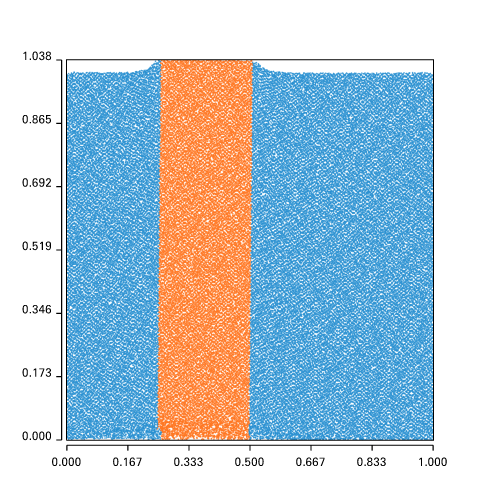

In [9]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.03125, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.09375, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.15625, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/224344499


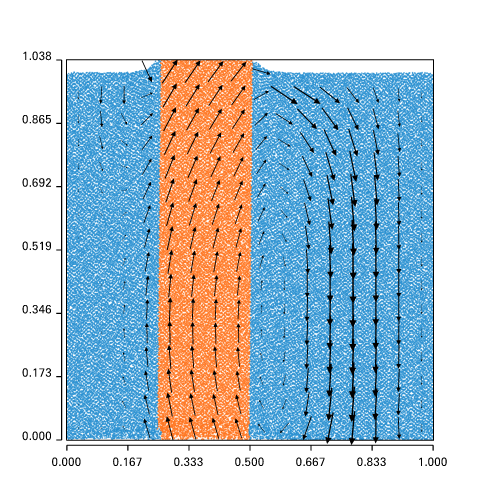

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.03125, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.09375, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.15625, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/224344499

In [10]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

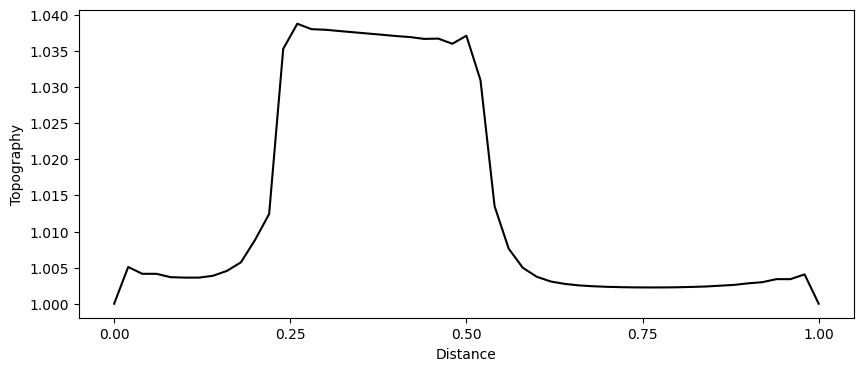

In [11]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [12]:
coords[:,1].mean()

1.0135732892858609

In [13]:
1/0.95*0.25+0.75

1.013157894736842

In [14]:
Model.velocityField.evaluate(Model.bottom_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -9.25597601e-07,  -4.62711928e-06],
       [ -1.20012080e-06,  -6.49197239e-06],
       [ -2.51243428e-07,  -7.41162076e-06],
       [  4.96040584e-07,  -6.59879852e-06],
       [  1.25585094e-06,  -4.63615888e-06],
       [  1.81069982e-06,  -1.20984162e-06],
       [  1.76157320e-06,   3.31725566e-06],
       [  1.52129318e-06,   9.42242077e-06],
       [ -2.61199886e-07,   1.63054201e-05],
       [ -1.85329912e-06,   2.58554657e-05],
       [ -8.24556755e-06,   3.43857390e-05],
       [ -1.52380557e-05,   5.45965966e-05],
       [ -1.52522523e-05,   5.36483324e-05],
       [ -1.52555776e-05,   5.26805043e-05],
       [ -1.52577494e-05,   5.17097416e-05],
       [ -1.52593470e-05,   5.07378235e-05],
       [ -1.52607896e-05,   4.97650744e-05],
       [ -1.52621428e-05,   4.87914782e-05],
       [ -1.52633565e-05,   4.78171858e-05],
       [ -1.52646595e-05,   4.68421508e-05],
       [ -1.52658655e-05,   4.58663807e-05],
       [ -

In [15]:
Model.velocityField.evaluate(Model.top_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.24735712e-06,  -1.40132505e-05],
       [  6.02674669e-06,  -2.41239079e-05],
       [  5.96922541e-06,  -2.82935496e-05],
       [  3.49194580e-06,  -3.02263035e-05],
       [  8.12598258e-07,  -3.15727401e-05],
       [ -2.16411868e-06,  -3.39869361e-05],
       [ -4.57770546e-06,  -3.81862543e-05],
       [ -5.86072997e-06,  -4.48604447e-05],
       [ -4.52592983e-06,  -5.40102685e-05],
       [  3.83986203e-06,  -6.23121342e-05],
       [  2.51156297e-05,  -5.51052252e-05],
       [  3.49083761e-05,   5.37505254e-05],
       [  3.51617158e-05,   5.30471137e-05],
       [  3.51521030e-05,   5.21168645e-05],
       [  3.51728605e-05,   5.11653790e-05],
       [  3.51875913e-05,   5.02066444e-05],
       [  3.52011683e-05,   4.92431896e-05],
       [  3.52141615e-05,   4.82766006e-05],
       [  3.52266940e-05,   4.73073621e-05],
       [  3.52384508e-05,   4.63357343e-05],
       [  3.52519018e-05,   4.53617181e-05],
       [  

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.03125, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.09375, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.15625, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/224344499


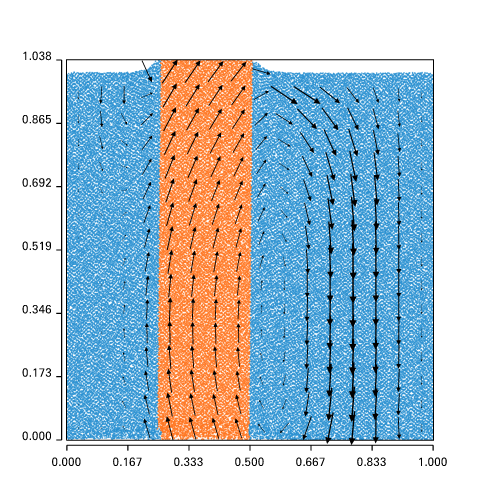

Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.03125, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.09375, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/2243444997.py:6
    Model = GEO.Model(elementRes=(x_res, y_res),

Error message:
FeVariable interpolation at location (0.15625, 1.00633) does not appear to be valid.
Location is probably outside local domain.
Issue utilising function of class 'MeshVariable' constructed at:

0- 0:/tmp/ipykernel_5018/224344499

In [16]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")